## Random Forest Classification

- ### Problem Statement
    - "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- ### Dataset
    - The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Holiday Package Prediction.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Data Cleaning

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
## Checking for all the unique values in categorical columns
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print("----------------------")

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
----------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
----------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
----------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
----------------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
----------------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
----------------------


In [6]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [7]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [10]:
## Missing Value Treatment
feature_columns_with_missing_values = [features for features in df.columns if df[features].isnull().sum() > 0]

In [11]:
for features in feature_columns_with_missing_values:
    print(f"{features}:", np.round(df[features].isnull().mean()*100, 4), "% missing values")

Age: 4.6236 % missing values
TypeofContact: 0.5115 % missing values
DurationOfPitch: 5.135 % missing values
NumberOfFollowups: 0.9206 % missing values
PreferredPropertyStar: 0.5319 % missing values
NumberOfTrips: 2.8642 % missing values
NumberOfChildrenVisiting: 1.3502 % missing values
MonthlyIncome: 4.7668 % missing values


In [12]:
## Stats of Null numerical columns
df[feature_columns_with_missing_values].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Imputing Missing Values
1. Impute Median for Age
2. Impute Mode for TypeofContact
3. Impute Median for DurationOfPitch
4. Impute Mode for NumberOfFollowups as it is Discrete Feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberOfTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [14]:
# Median imputation
df['Age'] = df['Age'].fillna(df['Age'].median())
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# Mode imputation
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])

In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df = df.drop('CustomerID', axis=1)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [20]:
df = df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1)

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
no_num_features = df.select_dtypes(exclude="object").columns

In [23]:
no_num_features, len(no_num_features)

(Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
        'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
        'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
       dtype='object'),
 12)

In [24]:
## Numerical Features
no_cat_features = df.select_dtypes(include="object").columns

In [25]:
## Categorical Features
no_cat_features, len(no_cat_features)

(Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'),
 6)

In [26]:
## Discrete Features
discrete_features = [feature for feature in no_num_features if len(df[feature].unique()) < 25]
print(f"Discrete Variables Count: {len(discrete_features)}")

Discrete Variables Count: 9


In [27]:
## Continuous Features
continuous_features = [feature for feature in no_num_features if feature not in discrete_features]
print(f"Continuous feature Count {len(continuous_features)}")

Continuous feature Count 3


In [28]:
X = df.drop(columns=['ProdTaken'], axis=1)
y = df['ProdTaken']

In [29]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [30]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


#### Splitting the data into train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train.shape, X_test.shape

((3421, 17), (1467, 17))

In [34]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [35]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer ## Column Transformer is used to apply different preprocessing to different columns

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [37]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [38]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,-0.649789,0.280718,-0.727208,-1.217370,-0.632714,1.409081,0.781435,0.460318,-0.067869
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.527737,-0.719632,1.768057,1.504605,-0.632714,1.409081,-1.279697,-1.005668,-0.777901
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.161582,1.281068,1.768057,-0.672975,1.580492,-0.046813,0.781435,-1.209722,-0.067869
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.771841,0.280718,0.520424,-0.128580,1.580492,-0.046813,0.781435,-0.017750,0.642163
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.527737,1.281068,0.520424,2.593396,-0.632714,0.681134,-1.279697,-0.423411,-0.067869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.649789,1.281068,-0.727208,-0.672975,-0.632714,-1.502707,0.781435,-0.531926,0.642163
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.470853,-0.893893,-0.719632,1.768057,-1.217370,-0.632714,1.409081,0.781435,1.512744,-0.067869
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,1.547143,0.280718,-0.727208,2.049001,-0.632714,-0.774760,0.781435,-0.357400,0.642163
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,1.791246,1.281068,-0.727208,-0.128580,-0.632714,-1.502707,0.781435,-0.250765,0.642163


In [40]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.283634,1.281068,-0.727208,-1.217370,-0.632714,-0.774760,-1.279697,-0.730338,-0.777901
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.378411,-0.527737,0.280718,0.520424,-1.217370,1.580492,1.409081,-1.279697,-0.663950,-0.067869
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,0.814832,0.280718,-0.727208,0.960210,-0.632714,1.409081,0.781435,-0.417017,-0.777901
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.714031,2.523557,2.281418,-0.727208,1.504605,-0.632714,-0.046813,0.781435,-0.113100,0.642163
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,-1.015945,0.280718,0.520424,-0.128580,1.580492,0.681134,0.781435,-0.314332,2.062226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,1.791246,0.280718,-0.727208,-0.128580,-0.632714,-0.046813,0.781435,1.022828,0.642163
1463,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.771841,0.280718,-0.727208,0.415815,-0.632714,-1.502707,0.781435,-0.540201,1.352195
1464,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.714031,1.303039,0.280718,0.520424,1.504605,-0.632714,-0.046813,0.781435,-0.080752,-0.067869
1465,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.714031,-1.015945,0.280718,-0.727208,1.504605,-0.632714,-0.046813,0.781435,1.975766,-0.067869


#### Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [42]:
models = {
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

In [43]:
for m in range(len(list(models))):
    model = list(models.values())[m]
    model.fit(X_train, y_train)

    ## Predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    ## Training Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

    ## Testing Accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred)
    test_classification_report = classification_report(y_test, y_pred)
    test_confusion_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {list(models.keys())[m]}")

    print("Training Metrics:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Training F1 Score: {train_f1}")
    print(f"Training Precision: {train_precision}")
    print(f"Training Recall: {train_recall}")
    print(f"Training ROC AUC: {train_roc_auc}")
    print(f"Training Classification Report: \n{train_classification_report}")
    print(f"Training Confusion Matrix: \n{train_confusion_matrix}")

    print('-'*35)

    print("\nTesting Metrics:")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Testing F1 Score: {test_f1}")
    print(f"Testing Precision: {test_precision}")
    print(f"Testing Recall: {test_recall}")
    print(f"Testing ROC AUC: {test_roc_auc}")
    print(f"Testing Classification Report: \n{test_classification_report}")
    print(f"Testing Confusion Matrix: \n{test_confusion_matrix}")

    print('='*35)
    print('\n')


Model: Logisitic Regression
Training Metrics:
Training Accuracy: 0.8450745396083017
Training F1 Score: 0.8188300489955811
Training Precision: 0.7101449275362319
Training Recall: 0.30340557275541796
Training ROC AUC: 0.6372883719632946
Training Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2775
           1       0.71      0.30      0.43       646

    accuracy                           0.85      3421
   macro avg       0.78      0.64      0.67      3421
weighted avg       0.83      0.85      0.82      3421

Training Confusion Matrix: 
[[2695   80]
 [ 450  196]]
-----------------------------------

Testing Metrics:
Testing Accuracy: 0.8432174505794138
Testing F1 Score: 0.8192671796105939
Testing Precision: 0.671875
Testing Recall: 0.31386861313868614
Testing ROC AUC: 0.6393316242558477
Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.96  

#### Hyperparameter Tuning

In [44]:
rf_params = {
    'n_estimators':[100, 200, 300, 400, 500, 800, 1000],
    'max_depth':[None, 5, 10, 15, 20, 25],
    'max_features':['sqrt', 'log2', None],
    'min_samples_split':[2, 5, 10, 15, 20, 100],
    'min_samples_leaf':[1, 2, 5, 10]
}

In [45]:
randomcv_models = [
    ('Random Forest', RandomForestClassifier(), rf_params)
]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

In [47]:
for name, model, params in randomcv_models:
    rs_cv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=5, verbose=2, n_jobs=-1)
    rs_cv.fit(X_train, y_train)
    model_params[name] = rs_cv.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estima

In [48]:
for model_name in model_params:
    print(f"----------------------Best Parameters for {model_name}----------------------")
    print(model_params[model_name])

----------------------Best Parameters for Random Forest----------------------
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 25}


In [50]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=25)
}

In [51]:
for m in range(len(list(models))):
    model = list(models.values())[m]
    model.fit(X_train, y_train)

    ## Predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    ## Training Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

    ## Testing Accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred)
    test_classification_report = classification_report(y_test, y_pred)
    test_confusion_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {list(models.keys())[m]}")

    print("Training Metrics:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Training F1 Score: {train_f1}")
    print(f"Training Precision: {train_precision}")
    print(f"Training Recall: {train_recall}")
    print(f"Training ROC AUC: {train_roc_auc}")
    print(f"Training Classification Report: \n{train_classification_report}")
    print(f"Training Confusion Matrix: \n{train_confusion_matrix}")

    print('-'*35)

    print("\nTesting Metrics:")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Testing F1 Score: {test_f1}")
    print(f"Testing Precision: {test_precision}")
    print(f"Testing Recall: {test_recall}")
    print(f"Testing ROC AUC: {test_roc_auc}")
    print(f"Testing Classification Report: \n{test_classification_report}")
    print(f"Testing Confusion Matrix: \n{test_confusion_matrix}")

    print('='*35)
    print('\n')


Model: Random Forest
Training Metrics:
Training Accuracy: 1.0
Training F1 Score: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training ROC AUC: 1.0
Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421

Training Confusion Matrix: 
[[2775    0]
 [   0  646]]
-----------------------------------

Testing Metrics:
Testing Accuracy: 0.9379686434901159
Testing F1 Score: 0.9348568966399219
Testing Precision: 0.9295774647887324
Testing Recall: 0.7226277372262774
Testing ROC AUC: 0.8550271963583189
Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1193
           1       0.93      0.72      0.81       274



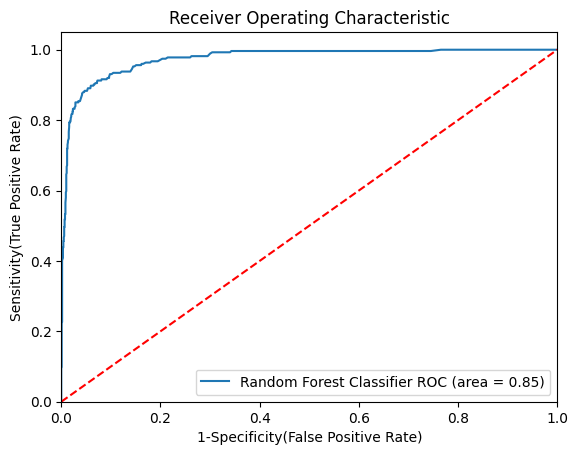

In [52]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=25),
    'auc':  0.8550
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 